In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Read data set
data = pd.read_csv("Mall_Customers.csv")

In [5]:
data.head

<bound method NDFrame.head of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

# Data Preprocessing

In [6]:
data.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [12]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [17]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No missing vcalue

In [23]:
#Drop CustomerID 
data = data.drop('CustomerID', axis=1)

In [24]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

# Perform Machine Learning

In [25]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [26]:
#Encode Gender
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [27]:
data.head

<bound method NDFrame.head of      Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         1   19                  15                      39
1         1   21                  15                      81
2         0   20                  16                       6
3         0   23                  16                      77
4         0   31                  17                      40
..      ...  ...                 ...                     ...
195       0   35                 120                      79
196       0   45                 126                      28
197       1   32                 126                      74
198       1   32                 137                      18
199       1   30                 137                      83

[200 rows x 4 columns]>

0 for Female and 1 for male

# Feature Scaling

In [28]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

In [29]:
# K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

C:\Anaconda_NAavigator\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda_NAavigator\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
# Add the cluster labels to the original dataframe
data['Cluster'] = clusters

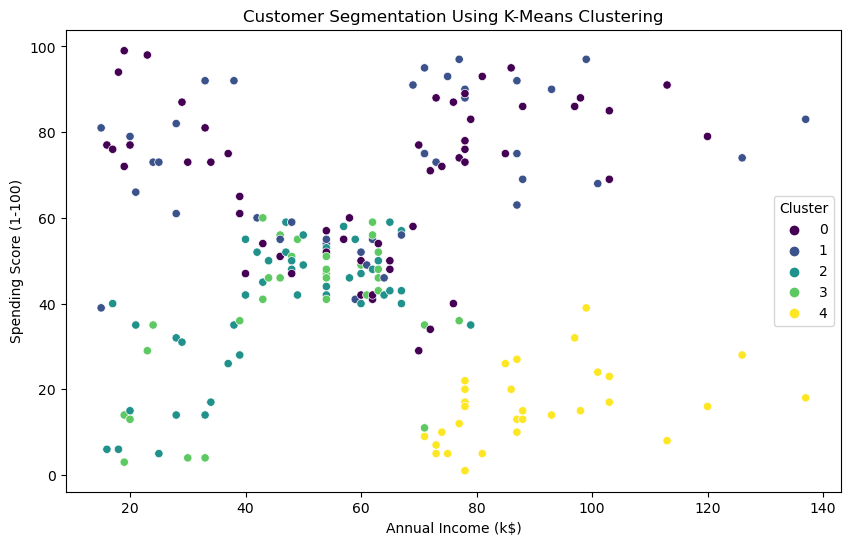

In [33]:
# Visualize the clusters in a 2D scatter plot (using Annual Income and Spending Score)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='viridis')
plt.title('Customer Segmentation Using K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

The scatter plot visualizes the customer segments based on their Annual Income and Spending Score using K-Means clustering. Each color represents a different cluster.

Interpretation
The clusters show different customer segments based on their spending patterns and income levels.
For example, customers with high income and low spending might be in one cluster, while high-income, high-spending customers may belong to another.